### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [25]:
df1=df['close']

In [26]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

Text(0, 0.5, 'price')

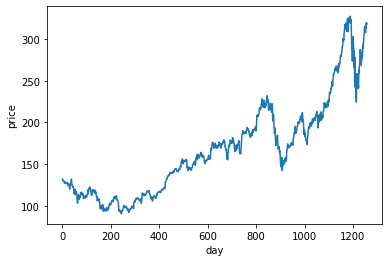

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel('day')
plt.ylabel('price')

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='close', ylabel='Density'>

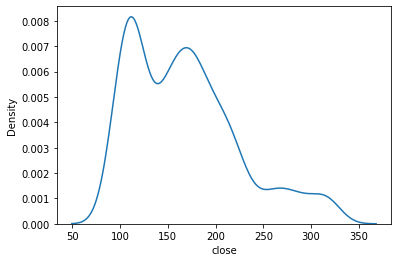

In [19]:
sns.kdeplot(df1)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
df1.values.reshape(-1,1)

array([[132.045],
       [131.78 ],
       [130.28 ],
       ...,
       [319.23 ],
       [316.85 ],
       [318.89 ]])

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df1.values.reshape(-1,1))

In [30]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [65]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:]

In [66]:
training_size,test_size

(817, 441)

In [35]:
import numpy as np

In [67]:
def create_dataset(dataset, time_step=1):
    data, target = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), 0]
        data.append(a)
        target.append(dataset[i + time_step, 0])
    return np.array(data), np.array(target)

In [68]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [69]:
X_train.shape, y_train.shape

((717, 100), (717,))

In [70]:
X_test.shape, y_test.shape

((341, 100), (341,))

In [73]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 50)          10400     
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 3s 227ms/step - loss: 8.8291e-04 - val_loss: 0.0040
Epoch 2/100
12/12 [==============================] - 0s 41ms/step - loss: 7.7715e-04 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 0s 40ms/step - loss: 7.4438e-04 - val_loss: 0.0039
Epoch 4/100
12/12 [==============================] - 0s 40ms/step - loss: 6.8943e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 0s 39ms/step - loss: 6.5685e-04 - val_loss: 0.0038
Epoch 6/100
12/12 [==============================] - 0s 39ms/step - loss: 6.0142e-04 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 0s 39ms/step - loss: 5.9721e-04 - val_loss: 0.0038
Epoch 8/100
12/12 [==============================] - 0s 39ms/step - loss: 5.8682e-04 - val_loss: 0.0042
Epoch 9/100
12/12 [==============================] - 2s 143ms/step - loss: 5.9355e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 2s 148ms

In [100]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error

In [91]:
r2_score(test_predict,y_test)

0.9813366827782483

In [117]:
df1.shape

(1258, 1)

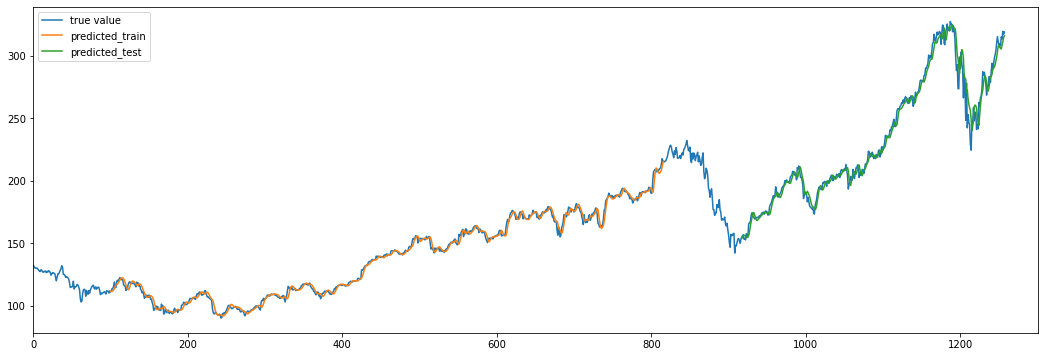

In [131]:
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1),label='true value')
x=np.arange(100,100+train_predict.shape[0])
y=scaler.inverse_transform(train_predict).reshape(-1)
plt.plot(x,y,label='predicted_train')
x=np.arange(200+train_predict.shape[0],df1.shape[0])
y=scaler.inverse_transform(test_predict).reshape(-1)
plt.plot(x,y,label='predicted_test')
plt.xlim(0,1300)
plt.legend()
plt.show()

### Generade prediction for next 10 days

In [249]:
model.predict(df1[-100:].reshape(1,100,1))

array([[0.9545933]], dtype=float32)

In [270]:
day=29
output=np.zeros(shape=day)
X_new=np.zeros(shape=(1,100+day,1))
X_new[:,:100,:]=df1[-100:].reshape(1,100,1)

for i in range(day):
    y_new=model.predict(X_new[:,i:i+100,:])
    output[i]=y_new[0][0]
    X_new[:,100+i,:]=output[i]

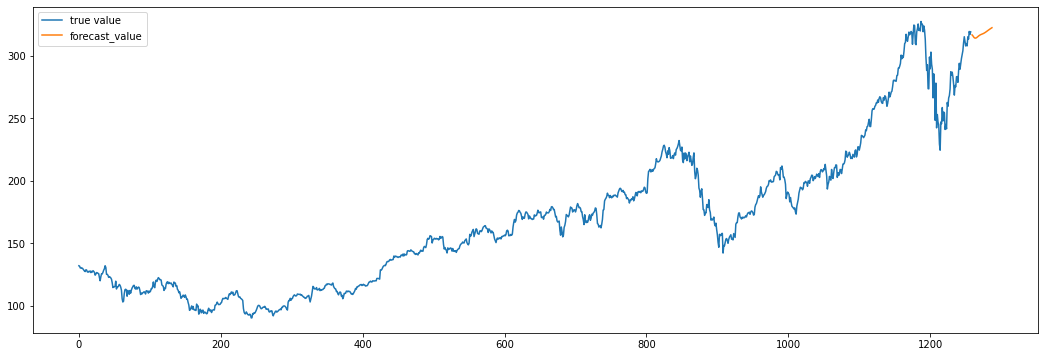

In [271]:
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1),label='true value')
###########################################################################
x=np.arange(df1.shape[0]+1,df1.shape[0]+day+1)
y=scaler.inverse_transform(output.reshape(-1,1))
plt.plot(x,y,label='forecast_value')
###########################################################################
# plt.xlim(0,1500)
plt.legend()
plt.show()